# Quotient Filter

Каждый элемент хэшируется, и хэш делится на две части:

Quotient (частное): Определяет индекс в таблице. Remainder (остаток): Хранится в таблице по этому индексу.

Остаток добавляется в список по индексу, соответствующему частному.

Чтобы проверить наличие элемента, вычисляем его частное и остаток. Смотрим, есть ли остаток в списке по индексу частного.

Если разные элементы имеют одинаковые частное и остаток, фильтр может ошибочно сообщить, что элемент есть в множестве.

Чем больше биты для частного и остатка, тем меньше ложноположительных срабатываний, но больше памяти требуется.

In [ ]:
class QuotientFilter:
    def __init__(self, q, r):
        self.q = q  # Количество бит для quotient
        self.r = r  # Количество бит для remainder
        self.size = 2 ** q  # Размер таблицы
        self.table = [None] * self.size  # Таблица для хранения остатков

    def _hash(self, item):
        # Хэшируем элемент и разделяем на quotient и remainder
        hash_value = hash(item) & ((1 << (self.q + self.r)) - 1)  # Ограничиваем хэш
        quotient = hash_value >> self.r  # Частное
        remainder = hash_value & ((1 << self.r) - 1)  # Остаток
        return quotient, remainder

    def insert(self, item):
        quotient, remainder = self._hash(item)
        if self.table[quotient] is None:
            self.table[quotient] = []
        self.table[quotient].append(remainder)

    def contains(self, item):
        quotient, remainder = self._hash(item)
        if self.table[quotient] is None:
            return False
        return remainder in self.table[quotient]

In [2]:
def false_positive_rate(filter, inserted_items, test_items):
    # Вставляем элементы
    for item in inserted_items:
        filter.insert(item)

    # Проверяем ложноположительные срабатывания
    false_positives = 0
    for item in test_items:
        if filter.contains(item) and item not in inserted_items:
            false_positives += 1

    return (false_positives / len(test_items)) * 100

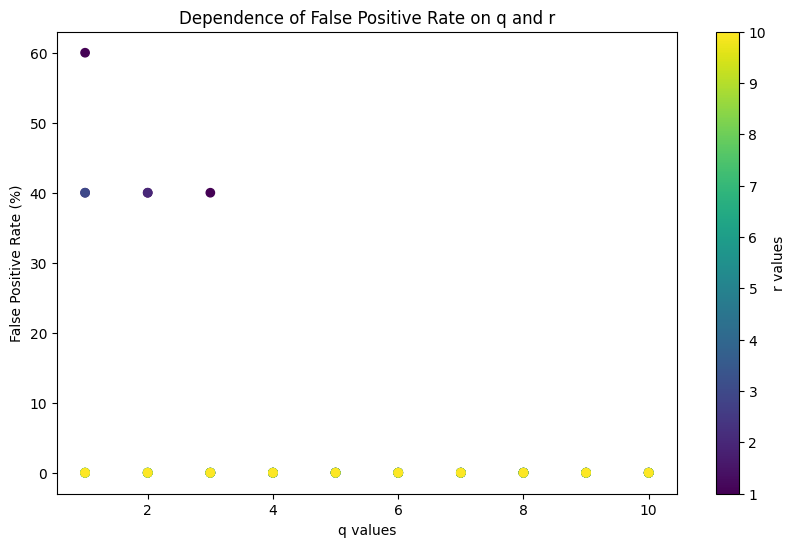

In [15]:
import matplotlib.pyplot as plt

def evaluate_false_positives(q_values, r_values, inserted_items, test_items):
    results = []
    for q in q_values:
        for r in r_values:
            qf = QuotientFilter(q, r)
            rate = false_positive_rate(qf, inserted_items, test_items)
            results.append((q, r, rate))
           # print(f"q={q}, r={r}, False Positive Rate={rate:.2f}%")
    return results

# Пример данных
inserted_items = ["apple", "banana", "cherry"]
test_items = ["date", "elderberry", "fig", "grape", "honeydew"]

# Оценка
q_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
r_values = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
results = evaluate_false_positives(q_values, r_values, inserted_items, test_items)

# Построение графика
q_results = [result[0] for result in results]
r_results = [result[1] for result in results]
rates = [result[2] for result in results]

plt.figure(figsize=(10, 6))
plt.scatter(q_results, rates, c=r_results, cmap='viridis')
plt.colorbar(label='r values')
plt.xlabel('q values')
plt.ylabel('False Positive Rate (%)')
plt.title('Dependence of False Positive Rate on q and r')
plt.show()